In [1]:
# Tales from the Crypto

# 1. Sentiment Analysis

# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/roshpanesar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 8768


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Richard Lawler',
 'title': 'A fake press release claiming Kroger accepts crypto reached the retailer’s own webpage',
 'description': 'A crypto hoax claimed Kroger is accepting Bitcoin Cash. The fake press release was similar to one targeting Walmart earlier this year. The retailer quickly confirmed it’s fake, but not before the cryptocurrency’s price spiked by $30.',
 'url': 'https://www.theverge.com/2021/11/5/22765098/kroger-bitcoin-cash-cryptocurrency-hoax-pump-dump',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/CKp0YjnwF88--mWg1kfPmspvfzY=/0x358:5000x2976/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/22988084/1234440443.jpg',
 'publishedAt': '2021-11-05T13:32:14Z',
 'content': 'A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars]'}

In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

Total articles about Ethereum: 3062


{'source': {'id': None, 'name': 'Blogspot.com'},
 'author': 'noreply@blogger.com (Unknown)',
 'title': 'Nervos launches cross-chain bridge to connect Ethereum and Cardano',
 'description': 'A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other public chains to come in the future.Nervos\xa0today announced that the Force Bridge is now live on the mainnet. The Nervos Network is a collection of…',
 'url': 'https://techncruncher.blogspot.com/2021/10/nervos-launches-cross-chain-bridge-to.html',
 'urlToImage': 'https://blogger.googleusercontent.com/img/a/AVvXsEgPPOybYbMwmsXrgektLx2gAB_TxrtYlXuFMKC9_ufbyBE23UZ7meSKtNO9FgKdDh0FZf-ugBepgc9Iooy6XQ5s4NkDthhSo2pPF-X2A3Aa2mXtZ5KSkUA4QwB7tEzJ8y79T4iN0A7XC-Ac_RdFuEhCDUuirVAvxQH4b_LUtvyto6aM_sFaDt5v39HYnQ=w1200-h630-p-k-no-nu',
 'publishedAt': '2021-10-16T18:50:00Z',
 'content': 'A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other pub

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937
1,2021-10-28,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904
2,2021-10-26,"For all the talk of democratizing finance, the...",0.0000,0.000,0.000,1.000
3,2021-10-21,Representation of cryptocurrency Bitcoin is pl...,0.0000,0.000,0.000,1.000
4,2021-10-20,A representation of the virtual cryptocurrency...,0.0000,0.000,0.000,1.000


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]
ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000
1,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.0,1.000
2,2021-11-05,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906
3,2021-11-01,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907
4,2021-11-01,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.102386,0.044570,0.022140,0.933300
std,0.341340,0.061158,0.046056,0.073012
min,-0.790600,0.000000,0.000000,0.659000
25%,0.000000,0.000000,0.000000,0.893750
50%,0.000000,0.000000,0.000000,0.936500
75%,0.386825,0.079000,0.010250,1.000000
max,0.807400,0.243000,0.280000,1.000000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.00000,100.000000,100.000000
mean,0.221510,0.07255,0.021700,0.905760
std,0.345964,0.06704,0.045488,0.078387
min,-0.659700,0.00000,0.000000,0.660000
25%,0.000000,0.00000,0.000000,0.850000
50%,0.171200,0.07250,0.000000,0.911500
75%,0.514625,0.11875,0.000000,1.000000
max,0.822500,0.24300,0.209000,1.000000


In [10]:
# 3 Questions:
# Question 1: Which coin had the highest mean positive score?
# Answer 1: Ethereum had the highest mean positive score with 0.07255 versus 0.044570 for bitcoin.

# Question 2: Which coin had the highest compound score?
# Answer 2: Ethereum had the highest compound score at 0.822500

# Question 3: Which coin had the highest positive score?
# Answer 3: Both Bitcoin & Ethereum had identical highest score at 0.243000

In [11]:
# 2. Natural Language Processing

# Tokenizer
# In this section, we will use NLTK and Python to tokenize the text for each coin.

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
regex = re.compile("[^a-zA-Z ]")


In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
  
    # Create a tokenized list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation from text
    words = list(filter(lambda t: t not in punctuation, words))
          
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in sw, words))
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]   
    
    return tokens

In [14]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df.text.apply(tokenizer)
bitcoin_df

,date,text,compound,positive,negative,neutral,tokens
0,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937,"[similar, hoax, earlier, year, tied, Walmart, ..."
1,2021-10-28,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904,"[Theres, big, new, presence, slurping, power, ..."
2,2021-10-26,"For all the talk of democratizing finance, the...",0.0000,0.000,0.000,1.000,"[talk, democratizing, finance, vast, majority,..."
3,2021-10-21,Representation of cryptocurrency Bitcoin is pl...,0.0000,0.000,0.000,1.000,"[Representation, cryptocurrency, Bitcoin, plac..."
4,2021-10-20,A representation of the virtual cryptocurrency...,0.0000,0.000,0.000,1.000,"[representation, virtual, cryptocurrency, Bitc..."
...,...,...,...,...,...,...,...
95,2021-11-01,Grill burger chain Burger King announced a par...,0.5423,0.099,0.000,0.901,"[Grill, burger, chain, Burger, King, announced..."
96,2021-10-30,Shiba inu dogs.\r\nGetty Images\r\nIt's been a...,0.2500,0.057,0.000,0.943,"[Shiba, inu, dog, Getty, Images, 's, incredibl..."
97,2021-10-26,Welcome to 10 Things Before the Opening Bell.\...,0.4588,0.073,0.000,0.927,"[Welcome, 10, Things, Opening, Bell, forwarded..."
98,2021-11-07,"Rahul Rai, co-head of Market Neutral at BlockT...",0.0000,0.000,0.000,1.000,"[Rahul, Rai, co-head, Market, Neutral, BlockTo..."


In [15]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df.text.apply(tokenizer)
ethereum_df

,date,text,compound,positive,negative,neutral,tokens
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.000,1.000,"[new, cross-chain, bridge, currently, connecte..."
1,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.000,1.000,"[Mark, Cuban, advice, people, new, investing, ..."
2,2021-11-05,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.000,0.906,"[Ethereum, bitcoin, two, biggest, cryptocurren..."
3,2021-11-01,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.000,0.907,"[Elon, Musk, picture, alliance, Getty, Images,..."
4,2021-11-01,Cryptocurrency and business continuity line im...,0.4588,0.097,0.000,0.903,"[Cryptocurrency, business, continuity, line, i..."
...,...,...,...,...,...,...,...
95,2021-10-18,An unofficial YouTube stream of the Apple even...,0.0000,0.000,0.000,1.000,"[unofficial, YouTube, stream, Apple, event, dr..."
96,2021-10-19,"Richerd Chen, a Canadian crypto developer, ref...",-0.3612,0.054,0.125,0.822,"[Richerd, Chen, Canadian, crypto, developer, r..."
97,2021-11-06,Shiba Inu(CRYPTO:SHIB) and Ethereum(CRYPTO:ETH...,0.1027,0.048,0.000,0.952,"[Shiba, Inu, CRYPTO, SHIB, Ethereum, CRYPTO, E..."
98,2021-10-29,"Ether, the second-largest cryptocurrency, soar...",0.6249,0.150,0.000,0.850,"[Ether, second-largest, cryptocurrency, soared..."


In [16]:
# NGrams and Frequency Analysis

from collections import Counter
from nltk import ngrams



In [17]:
# Generate the Bitcoin N-grams where N=2
N=2
grams = ngrams(tokenizer(bitcoin_df.text.str.cat()), N)
bitcoin_bigram = Counter(grams).most_common(20)
bitcoin_bigram

[(('char', 'Bitcoin'), 17),
 (('exchange-traded', 'fund'), 13),
 (('illustration', 'taken'), 10),
 (('New', 'York'), 10),
 (('Reuters', 'Bitcoin'), 9),
 (('Getty', 'Images'), 9),
 (('representation', 'virtual'), 8),
 (('virtual', 'cryptocurrency'), 8),
 (('picture', 'illustration'), 8),
 (('2021', 'REUTERS/Edgar'), 7),
 (('char', 'Reuters'), 7),
 (('Reuters', 'Staff'), 7),
 (('cryptocurrency', 'Bitcoin'), 6),
 (('char', 'representation'), 6),
 (('Bitcoin', 'seen'), 6),
 (('char', 'Posted'), 6),
 (('via', 'Getty'), 6),
 (('seen', 'picture'), 5),
 (('taken', 'October'), 5),
 (('record', 'high'), 5)]

In [18]:
# Generate the Ethereum N-grams where N=2
N=2
grams = ngrams(tokenizer(ethereum_df.text.str.cat()), N)
ethereum_bigram = Counter(grams).most_common(20)
ethereum_bigram

[(('Getty', 'Images'), 8),
 (('Bitcoin', 'Ethereum'), 8),
 (('illustration', 'taken'), 8),
 (('taken', 'June'), 7),
 (('Elon', 'Musk'), 6),
 (('char', 'Bitcoin'), 6),
 (('cryptocurrencies', 'Bitcoin'), 5),
 (('digital', 'asset'), 5),
 (('Axie', 'Infinity'), 5),
 (('Representations', 'cryptocurrencies'), 4),
 (('Ethereum', 'DogeCoin'), 4),
 (('DogeCoin', 'Ripple'), 4),
 (('Ripple', 'Litecoin'), 4),
 (('Litecoin', 'placed'), 4),
 (('placed', 'PC'), 4),
 (('PC', 'motherboard'), 4),
 (('motherboard', 'illustration'), 4),
 (('June', '29'), 4),
 (('29', '2021'), 4),
 (('2021', 'REUTERS/Dado'), 4)]

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
all_tokens = tokenizer(bitcoin_df.text.str.cat())
token_count(all_tokens, 10)

[('char', 97),
 ('Bitcoin', 59),
 ('bitcoin', 40),
 ('Reuters', 28),
 ('cryptocurrency', 24),
 ('…', 21),
 ('2021', 20),
 ('fund', 18),
 ('Images', 18),
 ('first', 17)]

In [21]:
# Use token_count to get the top 10 words for Ethereum
all_tokens = tokenizer(ethereum_df.text.str.cat())
token_count(all_tokens, 10)

[('char', 99),
 ('cryptocurrency', 30),
 ('Ethereum', 26),
 ('Bitcoin', 20),
 ('…', 18),
 ("'s", 17),
 ('new', 13),
 ('crypto', 13),
 ('cryptocurrencies', 12),
 ('Images', 12)]

In [22]:
# Word Clouds

from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

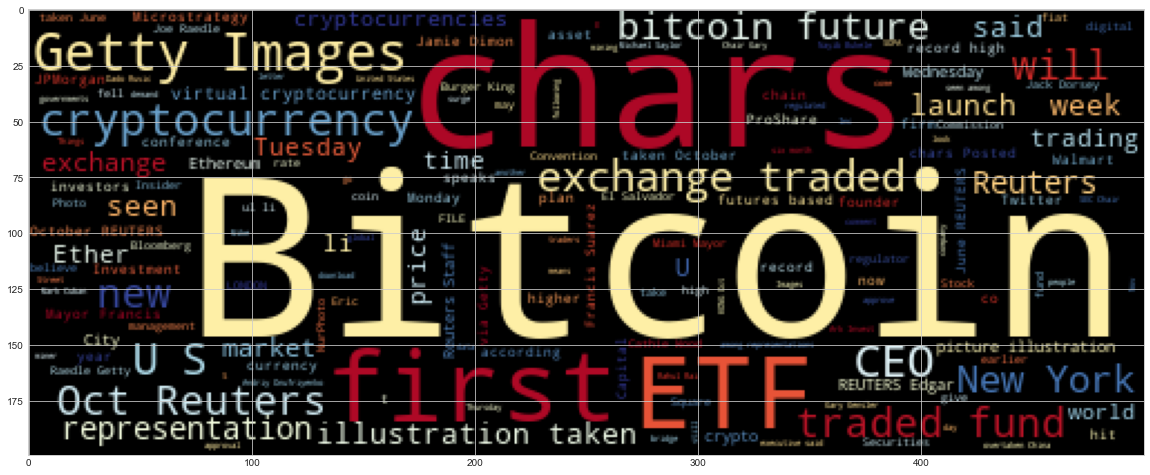

In [23]:
# Generate the Bitcoin word cloud
text=bitcoin_df.text.str.cat()
wc = WordCloud(width=500, colormap='RdYlBu').generate(text)
plt.imshow(wc)

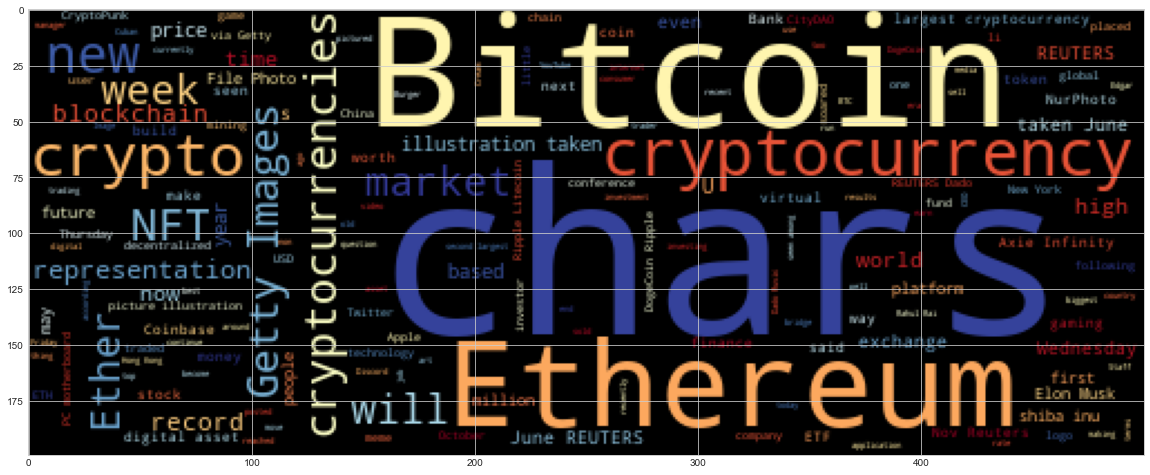

In [24]:
# Generate the Ethereum word cloud
text=ethereum_df.text.str.cat()
wc = WordCloud(width=500, colormap='RdYlBu').generate(text)
plt.imshow(wc)

In [25]:
# 3. Named Entity Recognition

import spacy
from spacy import displacy

In [26]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.9 MB 6.0 MB/s eta 0:00:01    |████████████████████▎           | 8.8 MB 5.3 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [28]:
# Bitcoin NER
# Concatenate all of the Bitcoin text together
text_bit=bitcoin_df.text.str.cat()

In [29]:
# Run the NER processor on all of the text
doc_bit = nlp(text_bit)

# Add a title to the document
doc_bit.user_data["title"] = "Bitcoin Named Entity Recognition"

In [30]:
# Render the visualization
displacy.render(doc_bit, style='ent')

In [31]:
# List all Entities
print([ent.text for ent in doc_bit.ents])

['earlier this year', 'Verge', 'Vox Media', 'Photo Illustration', 'Thiago Prudencio/S', 'U.S.', 'U.S.', 'China', 'Bloomberg', 'the National Bureau', 'Bitcoin', 'June 29, 2021', 'REUTERS', 'Dado Ruvic/', 'IllustrationHONG KONG', 'Oct 21', 'Reuters', 'Bitcoin', 'October 19, 2021', 'REUTERS', 'Reuters', 'Bitcoin', 'October 19, 2021', 'REUTERS', 'Edgar SuHONG KONG', 'Reuters', 'Wednesday', 'first', 'U.S.', 'Conway G. Gittens', 'Bitcoin', 'October 18, 2021', 'REUTERS', 'Oct 19', 'Reuters', 'six-month', '+2332 chars]By', 'Reuters', 'SINGAPORE', 'Reuters', 'six-month', 'Tuesday', 'U.S.', 'NurPhoto', 'Getty Images', 'first', 'Tuesday', 'ProShares', 'Bitcoin 2021', 'Marco Bello/', 'The Securities and Exchange Commission', 'Valkyrie', 'ETF', 'ETF', 'NurPhoto', 'ETF', 'first', 'ETF', 'Rafael Henrique/SOPA Images/LightRocket', 'Getty Images', '7%', 'Monday', 'morning', 'around $66,105', '3%', '4,722', 'over 9%', 'Mexican', 'Volaris', 'Benito Juarez International Airport', 'Mexico City', 'Mexico', 

In [32]:
# Ethereum NER
# Concatenate all of the Ethereum text together
text_eth=ethereum_df.text.str.cat()

In [33]:
# Run the NER processor on all of the text
doc_eth = nlp(text_eth)

# Add a title to the document
doc_eth.user_data["title"] = "Ethereum Named Entity Recognition "

In [34]:
# Render the visualization
displacy.render(doc_eth, style='ent')

In [35]:
# List all Entities
print([ent.text for ent in doc_eth.ents])

['Cardano', 'Nervos\xa0', 'today', 'the Force Bridge', 'Cuban', 'CNBC', 'Wednesday', 'two', 'Jordan Mansfield', 'JPMorgan', 'beca', 'Musk', 'Getty Images', 'Elon Musk', '3,780%', 'October', 'Dogelon Mars', '0.00000229', 'November 1', '0.0', 'Getty Images', 'the past week', 'Facebook', 'Tim Cook', "The New York Times'", 'Tuesday', 'Hong Kong', 'September 30, 2021', 'REUTERS/Tyrone Siu/File Photo', 'FTX', 'NFT', 'Robert Nickelsberg', 'Getty Images', 'Coinbase Global', 'NFT', 'the end of the year', 'US', '1-2%', 'Ethereum', 'NurPhoto', 'Getty Images', 'first', 'Bitcoin, Ethereum', 'DogeCoin', 'June 29, 2021', 'REUTERS', 'Dado Ruvic/Illustration/File Photo MU', 'Burger King', 'Robinhood', 'Royal Perks', '5', 'Rai', 'Market Neutral', 'BlockTower Capital', 'Rahul Rai', 'Crypto', 'Rahul Rai', 'second', 'a record above $', '4,400', 'Friday', 'Ethereum', 'Bitcoin’s', 'second', 'Reuters', 'a record $6.4 billion', 'this year', 'CoinShares', 'Thursday', '6:13 p.m.', 'New York', 'Ethereum', '0x8e39